In [4]:
import numpy as mp


In [9]:
class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.w = None

    def generate_polynomial_features(self, x):
        # 切片を考慮させるように、X0と多変量に変換する行列を初期化
        features = np.ones((x.shape[0], self.degree + 1))
        for i in range(1, self.degree + 1):  # 修正: self.degree + 1 までループ
            features[:, i] = x[:,0] ** i
        return features

    def fit(self, x, y):
        X_poly = self.generate_polynomial_features(x)
        self.w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X_test):
        X_test_poly = self.generate_polynomial_features(X_test) 
        return X_test_poly @ self.w


Mean Squared Error: 0.8532047992002305


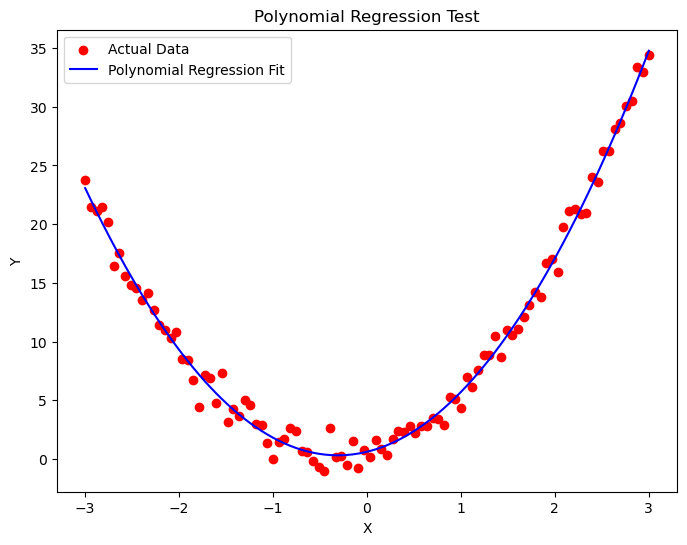

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# テストデータ生成
np.random.seed(0)
x = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2 * x + 3 * x**2 + np.random.normal(0, 1, x.shape[0]).reshape(-1, 1)

# 多項式回帰モデルのインスタンス化とフィット
model = PolynomialRegression(degree=2)
model.fit(x, y)

# 予測
y_pred = model.predict(x)

# モデル性能の評価（MSEを計算）
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# 結果のプロット
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x, y_pred, color='blue', label='Polynomial Regression Fit')
plt.title('Polynomial Regression Test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

